# Mesurer un temps de réaction 

## Niveau 

Première STI2D - STL. Spécialité physique-chimie et mathématiques.

## Modalités possible de mise en oeuvre

Cette activité peut-être mise en œuvre dans le cadre du cours de mathématiques de la spécialité physique-chimie et mathématiques de première STI2D ou STL et encadrée par le professeur de mathématiques. Elle peut être prolongée en physique ou en chimie dans le cadre de travaux pratiques expérimentaux sollicitant particulièrement les capacités exigibles de la partie « mesure et incertitudes » du programme.
Avant l’exploitation statistique des données, réalisée en classe, on demande aux élèves de recueillir, hors la classe, 300 temps de réaction en exploitant un programme écrit en langage Python.

## Hors la classe : recueil de 300 temps de réaction

En exécutant le programme « TempsReaction.py », l’ouverture d’une fenêtre permet de mesurer vos temps de réaction qui seront enregistrés dans un fichier csv (dans le dossier où figure le programme Python).
Il faut cliquer sur le bouton « Démarrer ! » (une seule fois pour démarrer l’enregistrement). Puis un clic dans la fenêtre (zone rose) fait disparaître l’étoile pour une durée aléatoire. Il faut cliquer dès que l’étoile réapparaît.
Effectuez quelques essais pour prendre en main l’application puis démarrer l’enregistrement de 300 parties de ce petit jeu. Faire une pause après chaque paquet de 100 sans cliquer sur « Quitter » et effectuer un peu plus de 100 parties afin d’éliminer les éventuelles parties avec pénalité (le clic a eu lieu avant l’apparition de l’étoile).
Vos temps de réaction, mesurés en ms par l’ordinateur, sont enregistrés dans le fichier « MesTempsReaction.csv », qui peut s’ouvrir avec un tableur.

## Partie A : analyse statistique des 300 temps de réaction

On modélise la situation en considérant la variable aléatoire *T* correspondant à votre temps de réaction en ms calculé par l’ordinateur en réponse à l’apparition de l’étoile (on suppose que ce temps de réaction est indépendant de la durée durant laquelle l’étoile a disparu). On souhaite estimer, à l’aide de mesures, votre temps de réaction moyen, c’est-à-dire l’espérance µ de la variable aléatoire *T*.

**1.** Implémenter en langage Python le programme suivant permettant la lecture et le stockage des mesures dans la variable M (le fichier « MesTempsReaction.csv » doit se trouver dans le même dossier que le fichier Python).

In [1]:
import pandas
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = pandas.read_csv('MesTempsReaction.csv', sep = ';')

**2.** Exécuter l’instruction M.head() et commenter l’affichage.

In [3]:
M.head()

,partie numero,temps,penalite
0,1,265,0
1,2,328,0
2,3,249,0
3,4,921,0
4,5,220,0


**3.** Exécuter l’instruction temps = list(M['temps']) qui crée la liste temps formée des temps de réaction contenus dans la colonne correspondante du tableau de mesures.

In [4]:
temps = list(M['temps'])

**4.** Pour la série de vos 300 mesures, calculer le temps moyen, le temps minimal, le temps maximal et l’écart type s de vos temps de réaction.

In [5]:
np.mean(temps)

297.47333333333336

In [6]:
s = np.std(temps)
s

69.80154694242496

In [7]:
np.min(temps), np.max(temps)

(203, 921)

**5.** Commenter l’affichage obtenu en saisissant les instructions suivantes :

plt.hist(temps, bins = 9)

plt.show()

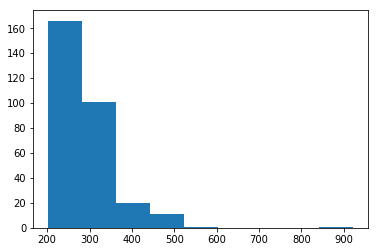

In [8]:
plt.hist(temps, bins = 9)
plt.show()

**6.** En déduire une estimation de µ à l’aide de vos 300 mesures en indiquant l’incertitude-type correspondante.

(Cette question n’est à traiter que si la notion d’incertitude-type a été vue en physique-chimie.)

## Partie B : étude de la distribution des moyennes obtenues sur des échantillons de taille 36

On comprend que plus on effectue de mesures, plus l’estimation de µ est précise. Il convient cependant de quantifier le gain en précision en fonction du nombre *n* de mesures réalisées. Pour cela, on étudie dans cette partie la variabilité de la moyenne obtenue sur un échantillon de 36 mesures.

**1.** Exécuter les instructions suivantes.

L = random.choices(temps, k = 36)

L

À quoi correspond la liste L ?


In [9]:
L = random.choices(temps, k = 36)
L

[296,
 250,
 359,
 312,
 250,
 328,
 296,
 281,
 249,
 265,
 296,
 234,
 265,
 249,
 250,
 298,
 296,
 249,
 265,
 265,
 328,
 250,
 281,
 343,
 234,
 343,
 359,
 374,
 265,
 281,
 265,
 328,
 265,
 406,
 296,
 249]

**2.** Calculer la moyenne des valeurs de la liste L.

In [10]:
np.mean(L)

289.44444444444446

**3.** Exécuter l’instruction suivante.

moyennes36 = [np.mean(random.choices(temps, k = 36)) for i in range(500)]

À quoi correspond la liste moyennes36 ?

In [11]:
moyennes36 = [np.mean(random.choices(temps, k = 36)) for i in range(500)]

**4.** Représenter, sous forme d’histogramme, les valeurs de la liste moyennes36. Comparer la forme de cet histogramme à celle de celui de la partie A.

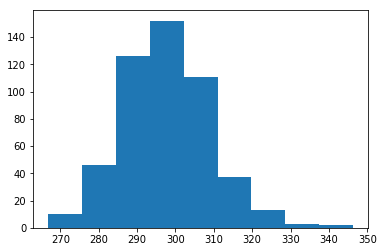

In [12]:
plt.hist(moyennes36, bins = 9)
plt.show()

**5.** Calculer l’écart type, noté s36, des valeurs de la liste moyennes36.

In [13]:
s36 = np.std(moyennes36)
s36

11.613751402492172

**6.** Exécuter les instructions suivantes permettant de superposer les histogrammes correspondant aux 300 mesures et aux 500 moyennes d’échantillons de taille 36. Pour faciliter la comparaison, on a normalisé les histogrammes (c’est-à-dire que l’aire globale de chacun est ramenée à une unité d’aire).

plt.hist(temps, bins = 9, density = True)

plt.hist(moyennes36, bins = 9, density = True, alpha = 0.5)

plt.show()

Commenter le graphique.

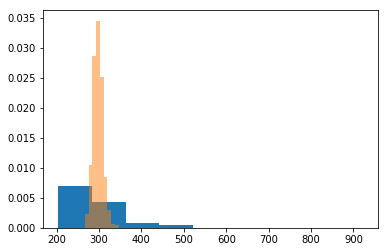

In [14]:
plt.hist(temps, bins = 9, density = True)
plt.hist(moyennes36, bins = 9, density = True, alpha = 0.5)
plt.show()

**7.** Calculer le rapport des écarts types  s / s36.

In [15]:
s / s36

6.0102497912471575

## Partie C : incertitude-type associée à une moyenne sur un échantillon de taille 36

On constate que passer de la distribution des mesures individuelles à celles des moyennes sur des échantillons de taille 36 conduit à diviser l’écart type par environ ${\sqrt{36}}$ = 6.
Par ailleurs, la distribution des moyennes des échantillons de taille 36 est beaucoup plus symétrique que celle des mesures individuelles avec un histogramme en forme de cloche, distribution dite « normale » ou « gaussienne » pour laquelle environ 95 % des valeurs sont comprises dans un intervalle centré sur la moyenne et de rayon deux écarts types.

**1.** Compléter les instructions suivantes puis exécuter le programme pour obtenir la fréquence des valeurs de la liste moyennes36 comprises dans l’intervalle

[m – 2 s36, m + 2 s36] où m est la moyenne de la liste moyennes36.

m = np.mean(moyennes36)

k = 0

for valeur in moyennes36:

    if ……………………………………………:
    
        k = k + 1
        
k / 500

Qu’observe-t-on ?

In [16]:
m = np.mean(moyennes36)
k = 0
for valeur in moyennes36:
    if m - 2 * s36 <= valeur <= m + 2 * s36:
        k = k + 1
k / 500

0.956

**2.** En physique-chimie, on adopte le procédé suivant pour estimer µ à partir d’un échantillon de 36 temps de réaction. On calcule la moyenne expérimentale et l’écart type expérimental des 36 mesures (dans le cas de 36 mesures, l’écart type expérimental est proche de l’écart type des 36 mesures).

On estime que µ vaut  la moyenne expérimentale avec une « incertitude-type » égale à  l'écart type expérimental divisé par racine de 36.

La « vraie » valeur de µ n’étant pas éloignée de la moyenne expérimentale de plus de deux incertitudes-types avec un niveau de confiance de 95 %.

**a.** Prélever un échantillon aléatoire de taille 36.

**b.** Calculer la moyenne et l’écart type de cet échantillon.

**c.** Donner une estimation de µ à partir de cet échantillon de taille 36 ainsi que l’incertitude type associée.

In [17]:
E = random.choices(temps, k = 36)
m_ech = np.mean(E)
s_ech = np.std(E)

In [18]:
m_ech

296.25

In [19]:
s_ech / 6

13.15273377911214